In [1]:
import pybaseball as bb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new stat: (Non-homerun Hits + Walks) * Homeruns / Innings Pitched -> HRM

heuristically measures how well the pitchers minimizes the effect of home runs
this might be a good stat to have in pitchers in today's baseball where
most scoring is coming from home runs

NOTE: each HRM value is PER SEASON comparable only 

In [161]:
cwd = '/Users/mason/w/cs/fun/baseball/data/pitching/'
graphs_dir = cwd + 'graphs/'

In [80]:
pitchers_2019 = bb.pitching_stats_bref(2019)
pitchers_2020 = bb.pitching_stats_bref(2020)
pitchers_2021 = bb.pitching_stats_bref(2021)

In [139]:
pitchers_base = {
    '2019': pitchers_2019,
    '2020': pitchers_2020, 
    '2021': pitchers_2021
}

In [165]:
for k, p in pitchers.items():
    p.to_csv(f'/Users/mason/w/cs/fun/baseball/data/pitching/hrm_{k}.csv')

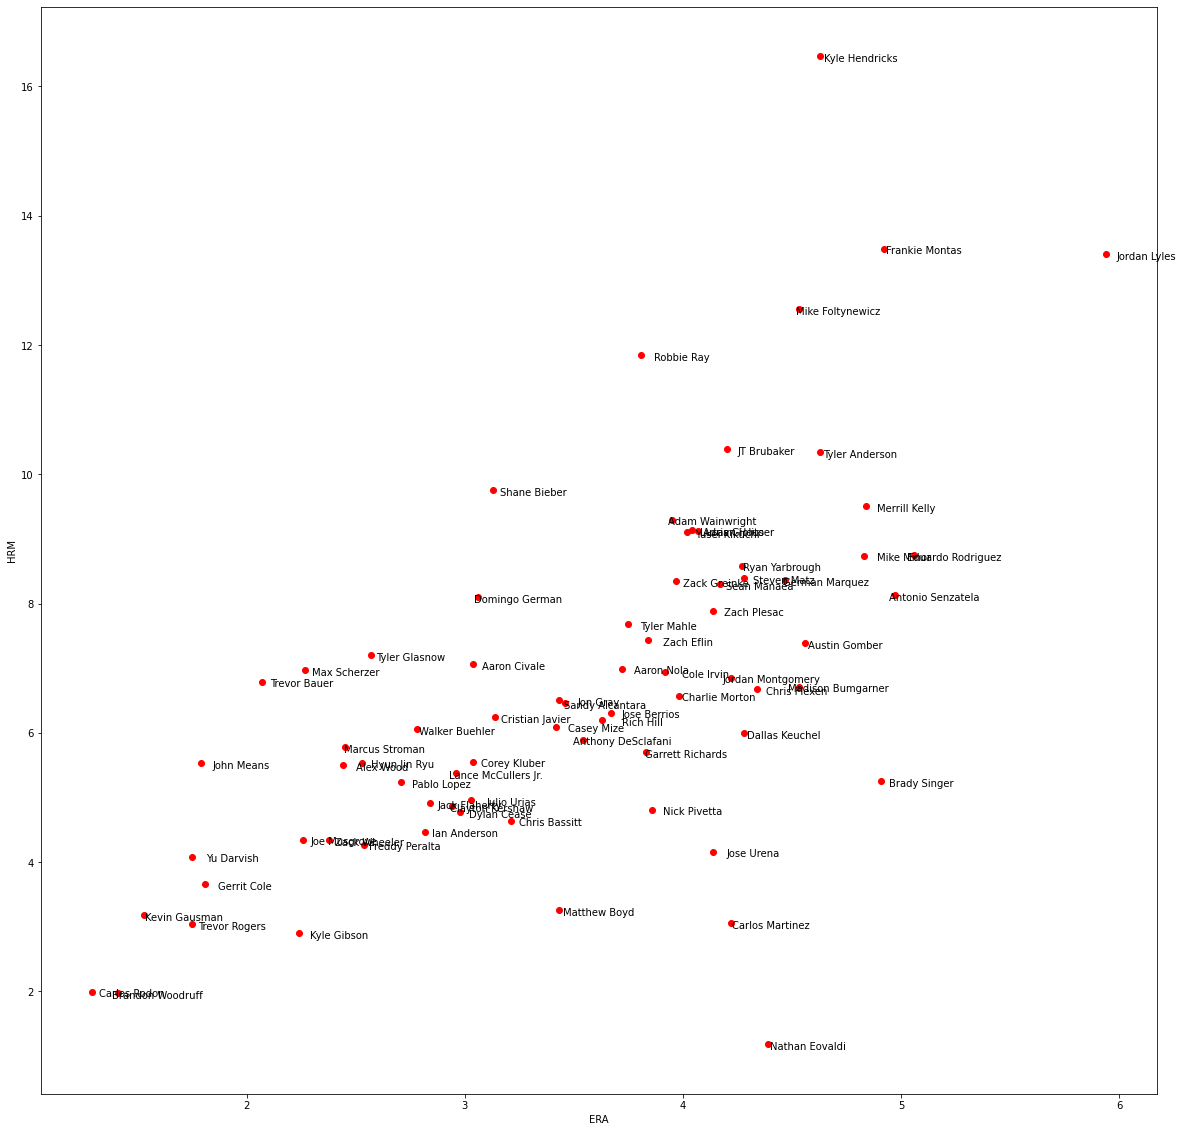

In [153]:
xlabel = 'ERA'
pitchers = init(75)
plot(pitchers['2021'], xlabel, 'HRM')

In [154]:
def plot(data, xlabel='IP',ylabel='HRM'):
    Name = data['Name']
    x = data[xlabel]
    y = data[ylabel]
    plt.figure(figsize=(20, 20))
    plt.plot(x, y, 'ro')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for name, xi, yi in zip(Name, x, y):

        label = name

        plt.annotate(label, # this is the text
                     (xi, yi), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(40,-5), # distance from text to points (x,y)
                     ha='center')
    return plt

def init(num_players=50):
    pitchers = pitchers_base.copy()
    for k, p in pitchers_base.items():
        p = p.sort_values(by='IP', ascending=False)[:num_players]
        p['HRM'] = p.apply(lambda row: (row.BB + row.H - row.HR) * row.HR / row.IP, axis=1)
        pitchers[k] = p.sort_values(by='HRM')[['Name', 'IP', 'HRM', 'ERA']]
    return pitchers

In [164]:
for year in ['2019', '2020', '2021']:
    for stat in ['IP', 'ERA']:
        filename = stat + 'vsHRM_' + year + '.jpg'
        pitchers = init(75)
        plt = plot(pitchers[year], stat, 'HRM')
        plt.savefig(graphs_dir+filename, transparent=False)
        plt.clf()

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>